# PyRETIS demo

Py - Python

RETIS - Replica Exchange Transition Interface Sampling

## Installing and testing


In [1]:
!python -m pip install pyretis
!python -m pip install git+https://github.com/mdtraj/mdtraj.git

     |████████████████████████████████| 1.4 MB 5.0 MB/s 
     |████████████████████████████████| 1.2 MB 20.8 MB/s 
     |████████████████████████████████| 4.3 MB 44.1 MB/s 
  Created wheel for sphinx-bootstrap-theme: filename=sphinx_bootstrap_theme-0.7.1-py3-none-any.whl size=1250234 sha256=7c9b3356a366b88568b9afa55ba48a089a816ebe2ffa0506825c8db75cf1c968
  Stored in directory: /root/.cache/pip/wheels/08/be/f3/01d145bc6faf769e37d9fb6f1d2f078bc8cd9725c9d883699c
Successfully built sphinx-bootstrap-theme
  Attempting uninstall: tables
    Found existing installation: tables 3.4.4
    Uninstalling tables-3.4.4:
      Successfully uninstalled tables-3.4.4
  Cloning https://github.com/mdtraj/mdtraj.git to /tmp/pip-req-build-ldsgre_q
  Running command git clone -q https://github.com/mdtraj/mdtraj.git /tmp/pip-req-build-ldsgre_q
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for mdtraj: filename=mdtra

In [2]:
!python -m unittest discover -v -s test

test_CleanImport (test.test_support.TestSupport) ... ok
test_DirsOnSysPath (test.test_support.TestSupport) ... ok
test_HOST (test.test_support.TestSupport) ... ok
test_args_from_interpreter_flags (test.test_support.TestSupport) ... ok
test_bind_port (test.test_support.TestSupport) ... ok
test_captured_stderr (test.test_support.TestSupport) ... ok
test_captured_stdin (test.test_support.TestSupport) ... ok
test_captured_stdout (test.test_support.TestSupport) ... ok
test_change_cwd (test.test_support.TestSupport) ... ok
test_change_cwd__chdir_warning (test.test_support.TestSupport)
Check the warning message when os.chdir() fails. ... ok
test_change_cwd__non_existent_dir (test.test_support.TestSupport)
Test passing a non-existent directory. ... ok
test_change_cwd__non_existent_dir__quiet_true (test.test_support.TestSupport)
Test passing a non-existent directory with quiet=True. ... ok
test_check__all__ (test.test_support.TestSupport) ... ok
test_check_syntax_error (test.test_support.TestSu

# Summary

This package does:

 - Transition Interface Sampling
  - Employs both the *shooting* and *time reversal* moves. 
 - Replica Exchange Transition Interface Sampling
  - Employs both the *shooting* and *time reversal* moves. In addition, RETIS makes use of the *swapping move*.

See [this link](http://www.pyretis.org/current/user/intro.html) for a full summary.

# 1D potential TIS example

Using the TIS algorithm, we will compute the rate constant for the transition between the two states. In order to obtain a rate constant, we will have to obtain both the crossing probability and an initial flux. To obtain to the crossing probability, we need to carry out TIS simulations for each path ensemble we define and in order to obtain the initial flux, we will have to carry out a MD simulation. Two kinds of input files are needed.

## Setting up the simulation task

Here, we are going to do a `tis` simulation and we will do 20000 steps. Since we will be running a path sampling simulation, we will also need to specify the positions of the interfaces we will be using.

All this system information is defined in a `.rst` file.

In [3]:
%%writefile tis.rst
TIS 1D example
==============

Simulation
----------
task = tis-multiple
steps = 20000
interfaces = [-0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, 1.0]

System
------
units = reduced
dimensions = 1
temperature = 0.07

Box
---
periodic = [False]

Engine
------
class = Langevin
timestep = 0.002
gamma = 0.3
high_friction = False
seed = 0

TIS
---
freq =  0.5
maxlength = 20000
aimless = True
allowmaxlength = False
zero_momentum = False
rescale_energy = False
sigma_v = -1
seed = 0

Initial-path
------------
method = kick

Particles
---------
position = {'file': 'initial.xyz'}
velocity = {'generate': 'maxwell',
            'momentum': False,
            'seed': 0}
mass = {'Ar': 1.0}
name = ['Ar']
type = [0]

Forcefield
----------
description = 1D double well

Potential
---------
class = DoubleWell
a = 1.0
b = 2.0
c = 0.0

Orderparameter
--------------
class = Position
dim = x
index = 0
periodic = False

Output
------
energy-file = 100
order-file = 100
trajectory-file = 100

Writing tis.rst


We also need a `.xyz` configuration file.

In [4]:
%%writefile initial.xyz
1

Ar -1.0 0.0 0.0

Writing initial.xyz


In [5]:
!mkdir TIS-1D/
!mv tis.rst TIS-1D/
!mv initial.xyz TIS-1D/
!ls TIS-1D/

initial.xyz  tis.rst


## Running the simulation

The simulation is run in two steps. First,the input TIS files are created for each path ensemble. 

In [6]:
%cd TIS-1D/
!pyretisrun -i tis.rst
%cd ..

/content/TIS-1D

  _______                                     ___________
 /   ___ \         ___  ____  ____________   / __     __/
/_/\ \_/ /_  __   / _ \/ __/ /_  _/ / ___/  /_/ / // /
   /  __  / / /  / /_)  _/    / // /\ \        / // /
  / /   \ \/ /  / _  \ /__   / // /__\ \    __/ // /__
 /_/    _\  /  /_/ |_|___/  /_//_/_____/   /_________/
       /___/

PyRETIS version: 2.5.0
Start of execution: 29.07.2021 17:07:54
Python version: 3.7.11

Running in directory: /content/TIS-1D
Input file: tis.rst
Log file: pyretis.log

Reading input settings from: tis.rst

Setting up simulation
* Created units: "reduced".
* Created engine: "Langevin MD integrator".
* Set up and create system.
* Set up and create force field.
* Set up and create simulation.
Will run simulation "tis-multiple".

Full settings used for simulation written to: out.rst

Input settings requests: TIS for multiple path ensembles.
Will create input files for the TIS simulations and exit

Creating input for TIS ensemble: 

Files named `tis-001.rst`, `tis-002.rst` and so on are created. Each one of these files defines a TIS simulation for a specific path ensemble.

In [7]:
!ls TIS-1D

initial.xyz  pyretis.log  tis-002.rst  tis-004.rst  tis-006.rst  tis.rst
out.rst      tis-001.rst  tis-003.rst  tis-005.rst  tis-007.rst


The nest step is to run the PyRETIS TIS simulations for each path ensemble. The individual TIS simulations can be executed by running the `pyretisrun` command. Note: this takes 30-60 minutes for each file, however it can be performed in parallel (not done here).

In [8]:
%cd TIS-1D/
#!pyretisrun -i tis-001.rst -p -f 001.log
#!pyretisrun -i tis-002.rst -p -f 002.log
#!pyretisrun -i tis-003.rst -p -f 003.log
#!pyretisrun -i tis-004.rst -p -f 004.log
#!pyretisrun -i tis-005.rst -p -f 005.log
#!pyretisrun -i tis-006.rst -p -f 006.log
#!pyretisrun -i tis-007.rst -p -f 007.log
%cd ..

/content/TIS-1D
/content


Instead we will cheat and use some files Will has precomputed :o

In [8]:
%cd TIS-1D/
!git clone https://github.com/williamjsdavis/PyRETIS_demo
!unzip PyRETIS_demo/001.zip
!unzip PyRETIS_demo/002.zip
!unzip PyRETIS_demo/003.zip
!unzip PyRETIS_demo/004.zip
!unzip PyRETIS_demo/005.zip
!unzip PyRETIS_demo/006.zip
!unzip PyRETIS_demo/007.zip
!unzip PyRETIS_demo/out.zip
!unzip PyRETIS_demo/flux.zip
!mv out/* .
%cd ..

/content/TIS-1D
Cloning into 'PyRETIS_demo'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 21 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (21/21), done.
Archive:  PyRETIS_demo/001.zip
   creating: 001/
  inflating: 001/.DS_Store           
   creating: __MACOSX/
   creating: __MACOSX/001/
  inflating: __MACOSX/001/._.DS_Store  
   creating: 001/accepted/
  inflating: __MACOSX/001/._accepted  
  inflating: 001/energy.txt          
  inflating: __MACOSX/001/._energy.txt  
  inflating: 001/ensemble.restart    
  inflating: __MACOSX/001/._ensemble.restart  
   creating: 001/generate/
  inflating: __MACOSX/001/._generate  
  inflating: 001/order.txt           
  inflating: __MACOSX/001/._order.txt  
  inflating: 001/pathensemble.txt    
  inflating: __MACOSX/001/._pathensemble.txt  
   creating: 001/traj/
  inflating: __MACOSX/001/._traj     
  inflating: 001/traj

## Analysing the results

When the all the TIS simulations are finished, we can analyse the results. PyRETIS will create a file, `out.rst_000`, which you can use for the analysis. This is a copy of the input `tis.rst` with some additional settings for the analysis.

The analysis itself is performed using the command

In [9]:
!ls TIS-1D

001  006	  out	       out.rst_003  out.rst_008   tis-003.rst  tis.rst
002  007	  out.rst      out.rst_004  PyRETIS_demo  tis-004.rst
003  flux	  out.rst_000  out.rst_005  pyretis.log   tis-005.rst
004  initial.xyz  out.rst_001  out.rst_006  tis-001.rst   tis-006.rst
005  __MACOSX	  out.rst_002  out.rst_007  tis-002.rst   tis-007.rst


In [10]:
%cd TIS-1D/
!pyretisanalyse -i out.rst_001
%cd ..

/content/TIS-1D

  _______                                     ___________
 /   ___ \         ___  ____  ____________   / __     __/
/_/\ \_/ /_  __   / _ \/ __/ /_  _/ / ___/  /_/ / // /
   /  __  / / /  / /_)  _/    / // /\ \        / // /
  / /   \ \/ /  / _  \ /__   / // /__\ \    __/ // /__
 /_/    _\  /  /_/ |_|___/  /_//_/_____/   /_________/
       /___/

                                                    Starting
analysis tool!
PyRETIS version: 2.5.0
Python version: 3.7.11
Running in directory: /content/TIS-1D
Report directory: /content/TIS-1D/report
Input file: out.rst_001
Reading input file "out.rst_001"
[WARNING]: Ignoring unknown "exe-path" in "simulation"
Created directory: "/content/TIS-1D/report"
Simulation task was: "tis-multiple"

Initial flux is not calculated here.
Remember to calculate this separately!
Analysing ensemble 1 of 7

TIS results for ensemble: [0^+]

+------------------------------------------------------+
|Interfaces                                    

In [11]:
!ls TIS-1D/report

001_lerror.png	       003_prun.txt.gz	      006_perror.png
001_lpath.png	       003_shoots.png	      006_perror.txt.gz
001_lpath.txt.gz       003_shoots_scaled.png  006_prun.png
001_pcross.png	       003_shoots.txt.gz      006_prun.txt.gz
001_pcross.txt.gz      004_lpath.png	      006_shoots.png
001_perror.png	       004_lpath.txt.gz       006_shoots_scaled.png
001_perror.txt.gz      004_pcross.png	      006_shoots.txt.gz
001_prun.png	       004_pcross.txt.gz      007_lpath.png
001_prun.txt.gz        004_perror.png	      007_lpath.txt.gz
001_shoots.png	       004_perror.txt.gz      007_pcross.png
001_shoots_scaled.png  004_prun.png	      007_pcross.txt.gz
001_shoots.txt.gz      004_prun.txt.gz	      007_perror.png
002_lpath.png	       004_shoots.png	      007_perror.txt.gz
002_lpath.txt.gz       004_shoots_scaled.png  007_prun.png
002_pcross.png	       004_shoots.txt.gz      007_prun.txt.gz
002_pcross.txt.gz      005_lpath.png	      007_shoots.png
002_perror.png	       005_lpath.txt.gz

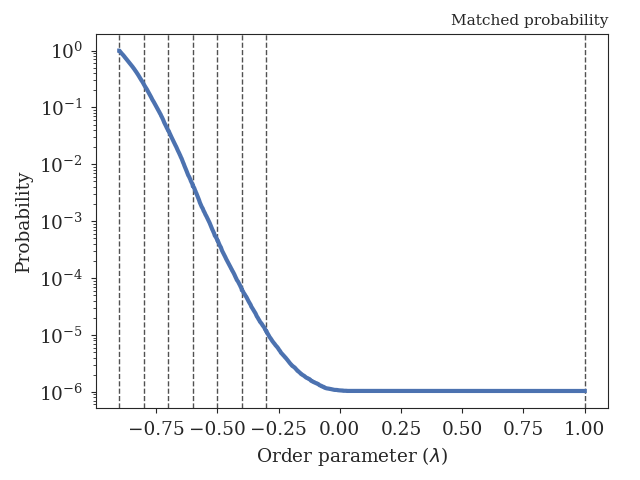

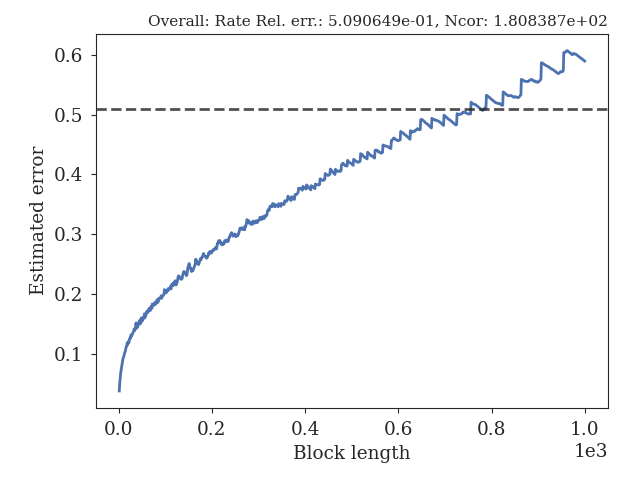

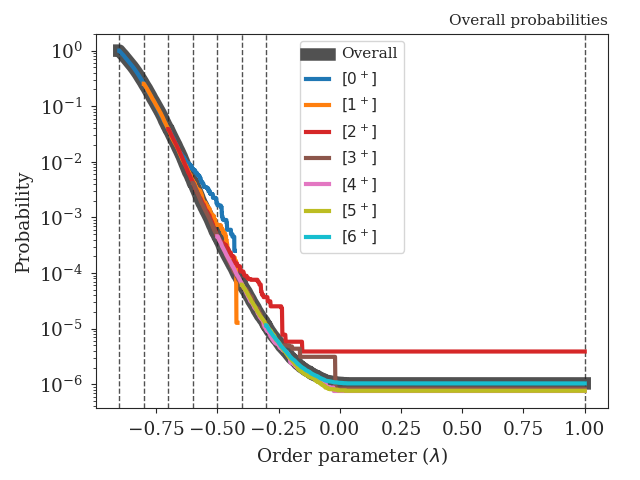

In [12]:
from IPython.display import Image, display
display(Image('TIS-1D/report/matched-probability.png'))
display(Image('TIS-1D/report/overall-err.png'))
display(Image('TIS-1D/report/total-probability.png'))
#display(Image('TIS-1D/report/001_lerror.png'))
#display(Image('TIS-1D/report/001_lpath.png'))
#display(Image('TIS-1D/report/001_pcross.png'))
#display(Image('TIS-1D/report/001_perror.png'))
#display(Image('TIS-1D/report/001_prun.png'))
#display(Image('TIS-1D/report/001_shoots.png'))
#display(Image('TIS-1D/report/001_shoots_scaled.png'))

## Creating and running the initial flux simulation

The initial flux simulation measure effective crossings with the first interface. In PyRETIS such a simulation is requested by selecting the md-flux task.

In [13]:
%%writefile flux.rst
MD flux simulation
==================

Simulation settings
-------------------
task = md-flux
steps = 1000000
interfaces = [-0.9]

System settings
---------------
units = lj
dimensions = 1
temperature = 0.07

Engine settings
---------------
class = Langevin
timestep = 0.002
gamma = 0.3
high_friction = False
seed = 0

Particles
---------
position = {'file': 'initial.xyz'}
velocity = {'generate': 'maxwell',
            'momentum': False,
            'seed': 0}
mass = {'Ar': 1.0}
name = ['Ar']
type = [0]

ForceField settings
-------------------
description = 1D double well potential

Potential
---------
class = DoubleWell
a = 1.0
b = 2.0
c = 0.0

Orderparameter
--------------
class = Position
dim = x
index = 0
periodic = False

Output
------
backup = overwrite
energy-file = 1000
order-file = 1000
cross-file = 1
trajectory-file = -1

Writing flux.rst


We also need an initial configuration file again.

In [14]:
%%writefile initial.xyz
1

Ar -1.0 0.0 0.0

Writing initial.xyz


In [15]:
!mkdir TIS-1D-flux/
!mv flux.rst TIS-1D-flux/
!mv initial.xyz TIS-1D-flux/
!ls TIS-1D-flux/

flux.rst  initial.xyz


The md-flux simulation can now be executed using:

In [16]:
%cd TIS-1D-flux/
#!pyretisrun -i flux.rst -p
!cp ../TIS-1D/flux/* .
%cd ..

/content/TIS-1D-flux
/content


## Analysing the md-flux results

When the md-flux simulation has finished, we can analyse the results. PyRETIS will create a file, `out.rst`, which you can use for the analysis. 

In [17]:
%cd TIS-1D-flux/
!pyretisanalyse -i out.rst
%cd ..

/content/TIS-1D-flux

  _______                                     ___________
 /   ___ \         ___  ____  ____________   / __     __/
/_/\ \_/ /_  __   / _ \/ __/ /_  _/ / ___/  /_/ / // /
   /  __  / / /  / /_)  _/    / // /\ \        / // /
  / /   \ \/ /  / _  \ /__   / // /__\ \    __/ // /__
 /_/    _\  /  /_/ |_|___/  /_//_/_____/   /_________/
       /___/

                                                    Starting
analysis tool!
PyRETIS version: 2.5.0
Python version: 3.7.11
Running in directory: /content/TIS-1D-flux
Report directory: /content/TIS-1D-flux/report
Input file: out.rst
Reading input file "out.rst"
[WARNING]: Ignoring unknown "exe-path" in "simulation"
Created directory: "/content/TIS-1D-flux/report"
Simulation task was: "md-flux"

Running analysis of a MD flux simulation...

Results from the MD flux analysis:

+----------------------------------------------------------------------------------------------------------------------+
|Flux for interfaces           

In [18]:
!ls TIS-1D-flux/report

ekinblock.png	  etotdist.txt.gz      order.png	   tempdist.png
ekinblock.txt.gz  md_flux_report.html  runenergies.png	   tempdist.txt.gz
ekindist.png	  md_flux_report.rst   runenergies.txt.gz  temperature.png
ekindist.txt.gz   md_flux_report.tex   runflux_1.png	   vpotblock.png
energies.png	  orderdist.png        runflux_1.txt.gz    vpotblock.txt.gz
errflux_1.png	  orderdist.txt.gz     runorder.png	   vpotdist.png
errflux_1.txt.gz  ordererror.png       runorder.txt.gz	   vpotdist.txt.gz
etotblock.png	  ordererror.txt.gz    runtemperature.png
etotblock.txt.gz  ordermsd.png	       tempblock.png
etotdist.png	  ordermsd.txt.gz      tempblock.txt.gz


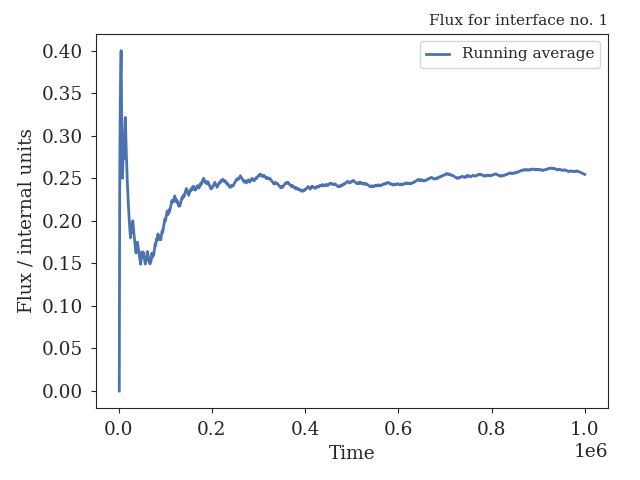

In [19]:
display(Image('TIS-1D-flux/report/runflux_1.png'))